# 01 Differential Geometry for Engineers

## A) Manifolds and Lie groups

$\color{#003660}{\text{Nina Miolane - Assistant Professor}}$ @ BioShape Lab @ UCSB ECE
- Texts and illustrations by [Adele Myers](https://ahma2017.wixsite.com/adelemyers) @ BioShape Lab.
- Textbook: Guigui, Miolane, Pennec, 2022. Introduction to Riemannian Geometry and Geometric Statistics.

<center><img src="figs/01_manifold_definitions1.png" width=1000px alt="default"/></center>


# Outline: Geometric Learning for BioShape Analysis

- **Unit 1 (Geometry - Math!): Differential Geometry for Engineers**
- **Unit 2 (Shapes)**: Computational Representations of Biomedical Shapes
- **Unit 3 (Machine Learning)**: Geometric Machine Learning for Shape Analysis
- **Unit 4 (Deep Learning)**: Geometric Deep Learning for Shape Analysis

<center><img src="figs/00_bioshape.jpg" width=500px alt="default"/></center>

Examples and applications will be taken from cutting-edge research in the **biomedical field**.

# Outline

- **Unit 1 (Geometry - Math!)**: Differential Geometry for Engineers
  - **A) Manifolds**
    - Our data spaces.
    - Example: a space of shapes.
  - C) Lie groups
    - Group of transformations that deform our data.
    - Example: the group of rotations.
  - B) Riemannian Metrics
    - Tools we use to compute on these spaces.
    - Example: helps computing a distance between two shapes.

# Motivation: Shape of Glaucoma

Glaucoma is a group of eye conditions that:
- damage the optic nerve, the health of which is vital for good vision. 
- are often caused by an abnormally high pressure in your eye.
- are one of the leading causes of blindness for people over the age of 60.

<center><img src="figs/01_optic_nerves.png" width=400px alt="default"/></center>
<center>Comparison of optic nerve heads in monkeys with and without glaucoma.</center>



$\color{#EF5645}{\text{Question}}$: Find shape markers of glaucoma that could lead to automatic diagnosis?

Data acquired with a Heidelberg Retina Tomograph - Patrangenaru and Ellingson (2015):
- 11 Rhesus monkeys
- 22 images of monkeys’ eyes:
  - an experimental glaucoma was introduced in one eye, 
  - while the second eye was kept as control. 
  
  <center><img src="figs/01_optic_nerves.png" width=400px alt="default"/></center>
<center>Comparison of optic nerve heads in monkeys with and without glaucoma.</center>


- On each image, 5 anatomical landmarks were recorded:
  - 1st landmark: superior aspect of the retina,
  - 2nd landmark: side of the retina closest to the temporal bone of the skull,
  - 3rd landmark: nose side of the retina,
  - 4th landmark: inferior point,
  - 5th landmark: optical nerve head deepest point.
 
Label 0 refers to a normal eye, and Label 1 to an eye with glaucoma.

$\color{#EF5645}{\text{Question}}$: Significant difference in shape formed by the landmarks?

# Exploratory Analysis

In [13]:
import matplotlib.colors as colors
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

import warnings
warnings.filterwarnings("ignore")

In [14]:
import geomstats.datasets.utils as data_utils

nerves, labels, monkeys = data_utils.load_optical_nerves()
print(nerves.shape)
print(labels)
print(monkeys)

(22, 5, 3)
[0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]
[ 0  0  1  1  2  2  3  3  4  4  5  5  6  6  7  7  8  8  9  9 10 10]


In [17]:
two_nerves = nerves[monkeys == 1]
print(two_nerves.shape)

two_labels = labels[monkeys == 1]
print(two_labels)

label_to_str = {0: "Normal nerve", 1: "Glaucoma nerve"}
label_to_color = {
    0: (102 / 255, 178 / 255, 255 / 255, 1.0),
    1: (255 / 255, 178 / 255, 102 / 255, 1.0),
}

(2, 5, 3)
[0 1]


Try looking at 3D triangles.

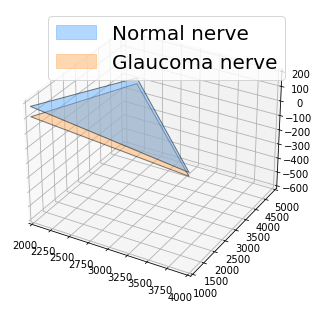

In [19]:
fig = plt.figure()
ax = Axes3D(fig); ax.set_xlim((2000, 4000)); ax.set_ylim((1000, 5000)); ax.set_zlim((-600, 200))

for nerve, label in zip(two_nerves, two_labels):
    x = nerve[1:4, 0]; y = nerve[1:4, 1]; z = nerve[1:4, 2]; verts = [list(zip(x, y, z))]
    poly = Poly3DCollection(verts, alpha=0.5); color = label_to_color[int(label)]; poly.set_color(colors.rgb2hex(color)); poly.set_edgecolor("k")
    ax.add_collection3d(poly)

patch_0 = mpatches.Patch(color=label_to_color[0], label=label_to_str[0], alpha=0.5)
patch_1 = mpatches.Patch(color=label_to_color[1], label=label_to_str[1], alpha=0.5)
plt.legend(handles=[patch_0, patch_1], prop={"size": 20}); plt.show()

# Towards a Quantitative Analysis

We could do statistics on the $\color{#EF5645}{\text{object}}$:
- 2D triangle = 3 points in 2D space $(x_1, y_1), (x_2, y_2), (x_3, y_3)$
  - 6 degrees of freedom
- 3D triangle = 3 points in 3D space $(x_1, y_1, z_1), (x_2, y_2, z_2), (x_3, y_3, z_3)$
  - 9 degrees of freedom

But we are really interested in its $\color{#EF5645}{\text{shape}}$: characteristics of the object that remain once we have filtered out the action of **group of transformations** that do not change the shape
- For 2D and 3D triangles, we only need 2 numbers to describe the shape (see Unit 2)
- ... at the cost of having data that belong to a curved space, called a **manifold**

### Manifold of 2D Triangle Shapes : Sphere

<center><img src="figs/01_triangles_2d.png" width=800px alt="default"/></center>

### Manifold of 3D Triangle Shapes : Half-Sphere

<center><img src="figs/01_triangle_3d.png" width=900px alt="default"/></center>

# Need for Foundations in Geometry

Questions:
- Why is the shape space of triangles a sphere or a half-sphere?
- Why and how do we perform computations and learning for data on a sphere, or half-sphere?

$\rightarrow$ Unit 1 defines the mathematical tools such that:
- We can answer these questions in the context of biomedical shape analysis.
- We present computational tools that can be used for the analysis of data on curved spaces...
  - ... beyond biomedical shape analysis.

# A) Manifolds: Outline

You will learn:

1. **What is a manifold?**
2. What are tangent spaces to a manifold?
3. Why do we care about manifolds?
4. How can we implement manifolds?

# 1. What is a manifold?

$\textbf{Intuition:}$ A manifold $M$ can be seen as a smooth surface with any dimension, where the dimension indicates the number of degrees of freedom that a data point has on this surface.

$\color{#047C91}{\text{Example}}$: A sphere is a two dimensional manifold.

<center><img src="figs/00_intro_sphere_manifold.png" width=600px alt="default"/></center>

$\textbf{Intuition:}$ When you are first learning, it can be a helpful starting point to think of a manifold as a surface. This surface can have any dimension and any shape as long as it is smooth (in the sense of being continuous and differentiable). 

For example, a hypersphere is a two dimensional manifold, and we will often use this manifold in examples. This is not a particularly precise definition, but it can be helpful starting point for building intuition. 

## Mathematical Definition(s)

### Definition 2: Local Implicit Function

There are different definitions of manifolds, because some manifolds are better described or implemented with one or the other. We see one that defines manifold $M$ through constraints.

$\color{#EF5645}{\text{Mathematical Definition}}$: For every $p \in M$, there exists an open set $U \in \mathbb{R}^{N}$ and a smooth map $f: U \to \mathbb{R}^{N-d}$ that is a submersion at p, such that $U \cap M = f^{-1}$({0}).

$\color{#EF5645}{\text{Explanation}}$: $M$ is the set of points that verify a constraint defined by an implicit equation, given by the function $f$: i.e. the points that verify $f(x) = 0$ for some $f$.

<center><img src="figs/01_manifold_definition2.png" width=600px alt="default"/></center>

### Hypersphere example

Let's prove that a hypersphere is a manifold using the definition.

$\color{#EF5645}{\text{Definition}}$: A $d$-dimensional hypersphere generalizes a 1-dimensional circle and a 2-dimensional sphere to $d$ dimensions. A $d$-dimensional hypersphere is the set of all points in $\mathbb{R}^{d+1}$ that are a given distance, called the radius $R$, from 0. 
$$ S = \{ x \in \mathbb{R}^{d+1}, ||x|| = R\}.$$

$\color{#047C91}{\text{Example}}$: The 2-dimensional hypersphere in 3-dimensions is the sphere.

<center><img src="figs/00_intro_sphere_manifold.png" width=400px alt="default"/></center>

$\textbf{How do we know that a hypersphere is a manifold?}$ 

We know from the definition that points on a hypersphere $S$ verify $\|x\|^{2} = 1$.

We define the function $f(x) = \|x\|^{2} - 1$ that will equal zero for all points that lie on $S$:

$x \in S \iff f(x) = 0$

which tells us that 

$x \in S \iff x \in f^{-1}$({0})

This matches the definition 2 of a manifold: $S = f^{-1}$({0}) where $S$ is the set of points $x$ that satisfy the condition $\|x\|^{2} = 1$. 

Therefore, $S$ is a manifold.

## First Example of Manifold

The shape space of 2D triangles is a sphere, thus it is our first example of manifolds.

<center><img src="figs/01_triangles_2d.png" width=600px alt="default"/></center>

# Other Examples of Manifolds

- **Vector spaces**

<center><img src="figs/01_vectorspace.png" width=400px alt="default"/></center>


- **A shape itself !**
  - $\color{#047C91}{\text{Example}}$: Surface of the heart is a manifold

<center><img src="figs/01_heart.jpeg" width=200px alt="default"/></center>

- **4-dimensional space-time**

<center><img src="figs/01_spacetime.jpeg" width=700px alt="default"/></center>

- **Perception manifolds**
  - $\color{#047C91}{\text{Example}}$: The Hyperbolic geometry of DMT experiences

<center><img src="figs/01_perception.jpeg" width=700px alt="default"/></center>

# A) Manifolds: Outline

You will learn:

1. What is a manifold? 
2. **What are tangent spaces to a manifold?**
3. Why do we care about manifolds?
4. How can we implement manifolds?

# What are Tangent Vectors and Tangent Spaces?

Consider the shape space of triangle, representing shapes of optic nerve head.

$\color{#EF5645}{\text{Question}}$: How does the shape of the optic nerve head evolve in time?
- Evolution is represented as a trajectory on the shape space (in blue below).

$\color{#EF5645}{\text{Question}}$: What is the speed of shape change?
- We need the notion of tangent vector and tangent space.


<center><img src="figs/01_triangle_curve.png" width=550px alt="default"/></center>

### Tangent Vector to the Sphere

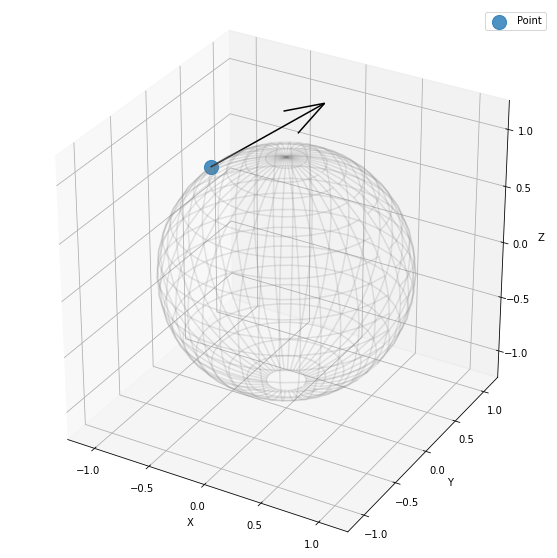

In [20]:
import numpy as np
import geomstats.visualization as viz
fig = plt.figure(figsize=(10, 10)); ax = fig.add_subplot(111, projection="3d")

point = np.array([-0.65726771, -0.02678122, 0.7531812])
vector = np.array([1, 0, 0.8])
ax = viz.plot(point, ax=ax, space="S2", s=200, alpha=0.8, label="Point")

arrow = viz.Arrow3D(point, vector=vector); arrow.draw(ax, color="black"); ax.legend();

# Tangent Space

$\color{#EF5645}{\text{Definition}}$: The tangent space at a certain point $p$ on a manifold $M$ is written $T_p M$ and is comprised of all of the possible tangent vectors that exist at that point.
- The tangent space has the same dimension as the manifold.

<center><img src="figs/01_tangentspace.jpeg" width=900px alt="default"/></center>

Thus, the tangent space of a 1-dimensional manifold (curve) is also one dimensional, and the tangent space of a 2-dimensional manifold (a 2-dimensional surface) is also 2-dimensional.


Similarly, for every n-dimensional manifold, there exists an n-dimensional tangent space at each point on the manifold, and the tangent space is comprised of all possible tangent vectors on that manifold.

### Tangent Space to the Hypersphere

Recall that the hypersphere is the manifold defined by $S=f^{-1}(\{0\})$ where $f(x) = \|x\|^{2}-1$. 

The tangent space to the hypersphere is defined, at any point $x$ on $S^{d}$ by:
$$
T_{x} S^{d}=\left\{v \in \mathbb{R}^{d+1} \mid\langle x, v\rangle=0\right\} .
$$

$\color{#EF5645}{\text{Remark}}$: The tangent space depends on the point $x$ chosen on the manifold.

<center><img src="figs/01_tangentspace.jpeg" width=900px alt="default"/></center>

# A) Manifolds: Outline

You will learn:

1. What is a manifold? 
2. What are tangent spaces to a manifold?
3. **Why do we care about manifolds?**
4. How can we implement manifolds?

# 3. Why do we care about manifolds?

$\textbf{Data in nature "naturally falls on manifolds"}$: data are often subject to constraints, and these constraints force the data to lie on manifolds. 

<center><img src="figs/01_manifold_cities_on_earth.png" width=200px alt="default"/></center>

$\color{#047C91}{\text{Example}}$: The cities on earth are subject to the following constraints:
-  1) they cannot fly above the surface of the earth because gravity holds them down
- 2) they cannot sink down into the earth because the surface of the earth holds them up. 

$\rightarrow$ they are constrained to move (or not move) on the surface of a sphere.

$\textbf{Shapes "naturally falls on manifolds"}$: shapes are subject to constraints, and these constraints force them to lie on manifolds. 

$\color{#047C91}{\text{Example}}$: Consider the shape of a triangle:
- 1) the shape of a triangle does not change if we translate or rotate the triangle,
- 2) the shape of a triangle does not change if we rescale it.

<center><img src="figs/01_intro_sphere_triangles.png" width=450px alt="default"/></center>


We will see that these constraints force triangles to belong to a sphere.

# What is the motivation for analyzing data on manifolds?

Analyzing data that lie on manifolds is often possible without taking into account the manifold...

...but choosing to do so can be advantageous:

a. it reduces the degrees of freedom of the system, which makes computations less complicated and more intuitive and interpretable.

b. it can give better understanding of the data's evolution.

c. it can give better predictive power and will help you extract the "signal" from a noisy data set or a data set with very few datapoints.

### a. Reduce the number of degrees of freedom

The number of degrees of freedom of a system is the minimum number of variables needed to describe the system completely.

$\color{#047C91}{\text{Example}}$:
- an object moving freely in 3D requires 3 variables $(x, y, z)$ or $(R, \theta, \phi)$ to be described.
- if you know that the point lies on the sphere, you only need two variables $(\theta, \phi)$.

<center><img src="figs/01_adv1.png" width=900px alt="default"/></center>

Knowing that the point lies on the surface of a manifold allows us to use fewer variables to record its location, which is:
- computationally more efficient in terms of memory requirements, and 
- less mentally taxing (if you are solving a problem on paper).

### b. Get a Better Understanding

Unaccelerated points travelling along a manifold follow trajectories called "geodesics". The geodesic is the path of shortest distance that a particle can travel in the space that it is in. 

$\color{#047C91}{\text{Example}}$: Geodesics in 2D and 3D vector space are straight lines (purple $\gamma$), but geodesics on the sphere are different (pink $\gamma$).

If you did not know that the object was moving on the sphere, you would wonder why it is taking such an "irratic" path instead of just going straight. 

If you know the manifold, you realize that the particles are following very reasonable and predictable paths along geodesics.

$\color{#047C91}{\text{Example}}$: Particle of light (photons) travel unaccelerated through space-time, and their trajectory is curved as they follow the curvature of the space near massive objects.

<center><img src="figs/01_adv2bis.png" width=250px alt="default"/></center>

### c. Get Better Predictive Power

Knowing the exact manifold your data lies on can help you analyze your current data points and predict future data.

$\color{#047C91}{\text{Example}}$: Take data on a 2-dimensional sphere.
- If you did not know that your data live on the surface of a sphere, then you might try to fit your data with a line -- see Fig. (b).
- However, you should fit a geodesic curve on a sphere -- see Fig. (a).

<center><img src="figs/01_adv3d.png" width=700px alt="default"/></center>

# 3. How can we implement manifolds?

$\color{#EF5645}{\text{Geomstats}}$: a Python package for Geometry in Machine Learning and Deep Learning

Geomstats uses [object-oriented programming](https://www.educative.io/blog/object-oriented-programming) to define manifolds as "classes" that are organized into a hierarchy. Subclasses are indicated by arrows and represent special cases of their parent class.

$\color{#047C91}{\text{Examples}}$: 
- `LevelSet` is the implementation of manifold corresponding to our definition.
  - it is thus a special case of `Manifold` and is implemented as a subclass.
- `Hypersphere` can be conveniently represented by our definition. 
  - it is thus a special case of a `LevelSet`.

<center><img src="figs/01_manifold_hierarchy.jpeg" width=900px alt="default"/></center>


Rules that are universally true for all manifolds are implemented in the parent class `Manifold`.

- $\color{#047C91}{\text{Example}}$: Every manifold has a dimension and a tangent space at each point.

Rules that are true for some manifolds are implemented in the subclasses of `Manifold`.

- $\color{#047C91}{\text{Example}}$: A vector space is a special type of manifold, where the tangent space is equal to the space itself.

<center><img src="figs/01_vectorspace.png" width=300px alt="default"/></center>

### Example: Hypersphere

A sphere is an hypersphere of dimension 2, which is a special case of manifold. 

Thus, the sphere should have a `dim` attribute, and `belongs`, `is_tangent`, `random_point` methods.

In [4]:
import numpy as np

from geomstats.geometry.hypersphere import Hypersphere

sphere = Hypersphere(dim=2); 
print(f"The sphere has dimension {sphere.dim}")
point = np.array([1, 0, 0]); 
print(f"Point is on the sphere: {sphere.belongs(point)}")
random = sphere.random_point(); 
print(f"Random point is on the sphere: {sphere.belongs(random)}")

The sphere has dimension 2
Point is on the sphere: True
Random point is on the sphere: True


# Take-Home Messages

- Data spaces of real-world applications are often manifolds.
- Properties of manifolds that be conveniently implemented in a unique framework of "classes".
- For the visualization project:
  - each team will describe one manifold from Geomstats and provide visualizations.
- For this class:
  - we will focus on manifolds that describe shape and shape tranformations.

<center><img src="figs/01_manifold_hierarchy.jpeg" width=800px alt="default"/></center>